# Jendela
Terdapat 2 cara untuk mendapatkan attenuasi pita henti yang lebih tinggi. Yaitu untuk jendela dengan panjang genap dan ganjil. Namun, kali ini kita akan menganalisis beberapa jenis jendela pada umumnya.

Dalam Python, kita dapat mengambil respon frekuensi untuk L = 16:

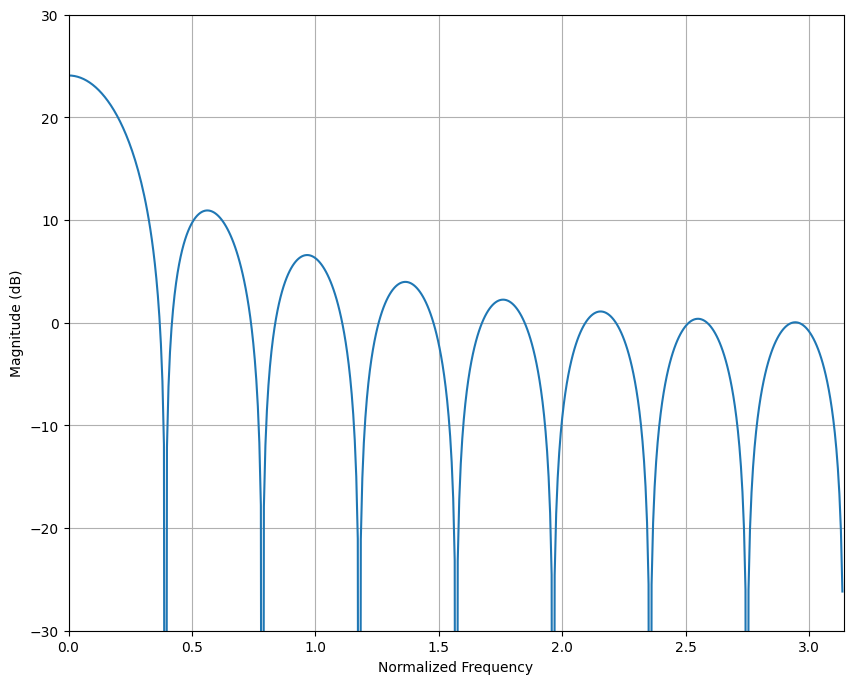

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

h=np.ones(16);
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.axis([0, 3.14, -30, 30])
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.grid()

Lob utama memiliki lebar sebesar 3 dB, attenuasi sisi lob sebesar -15 hingga -25 dB. Dapat dirancang dua jendela yang berbeda yang mengurangi penekanan dari wilayah transisi dari pita lintas ke pita henti dan menekan attenuasi pita henti lebih dari pita lintas.

Dapat dilihat dalam meminimalkan fungsi kesalahan kuadrat yang terbobot, di mana bagian yang ingin kita tekankan mendapatkan bobot yang lebih tinggi.

Dapat dirumuskan menggunakan Python, fungsi kesalahan dengan kesalahan kuadrat yang terbobot dengan pb, tb: jumlah sampel frekuensi di pita lintas dan pita transisi secara berturut-turut:

In [ ]:
import numpy as np
import scipy.signal as signal

def errfunc(h):
    numfreqsamples=512


    pb=int(numfreqsamples/4.0)

    tb=int(numfreqsamples/8.0)

    w, H = signal.freqz(h,1,numfreqsamples)
    H_desired=np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb)))
    weights = np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb)))
    err = np.sum(np.abs(H-H_desired)*weights)
    return err

# H yang diinginkan dan Bobot

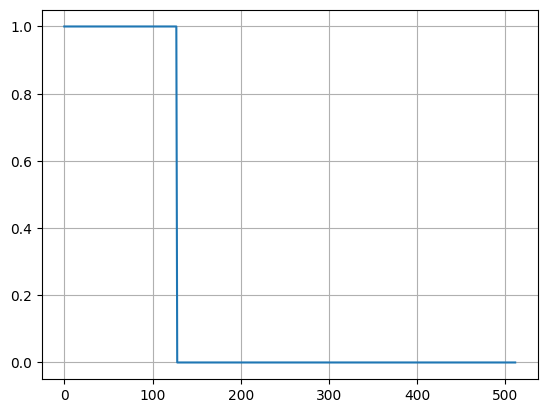

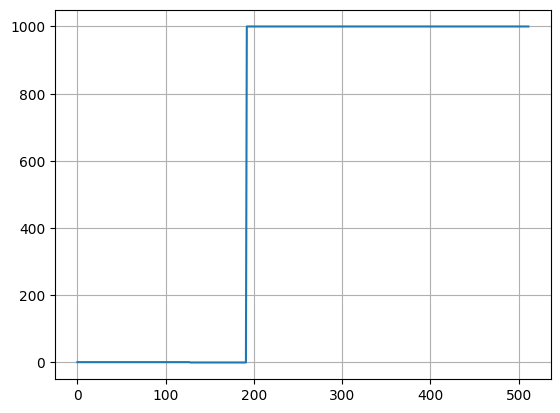

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

numfreqsamples=512


pb=int(numfreqsamples/4.0)

tb=int(numfreqsamples/8.0)


plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb))))
plt.grid()

plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb))))
plt.grid()

Kita dapat menerapkan optimisasi untuk mendapatkan sampel jendela yang meminimalkan kesalahan. Dalam kasus ini, sebuah jendela dari panjang 16 sampel dapat diperoleh dengan:

In [ ]:
import scipy.optimize as opt

minout=opt.minimize(errfunc,np.random.rand(16))
h=minout.x
print(h)
[-0.00028433 -0.0013443  -0.00396331 -0.00901458 -0.01664832 -0.02586522
 -0.0344325  -0.03971832 -0.03994815 -0.03504098 -0.02663534 -0.01727224
 -0.00929192 -0.00396101 -0.00124255 -0.0002329 ]

[-0.00041504 -0.00216891 -0.00669385 -0.01519614 -0.02771013 -0.04235923
 -0.05560399 -0.06345208 -0.06333117 -0.05523151 -0.04182239 -0.0271033
 -0.014661   -0.00632479 -0.00198416 -0.00033956]


[-0.26489597]

Didapatkan sebuah respon impuls sebagai berikut:

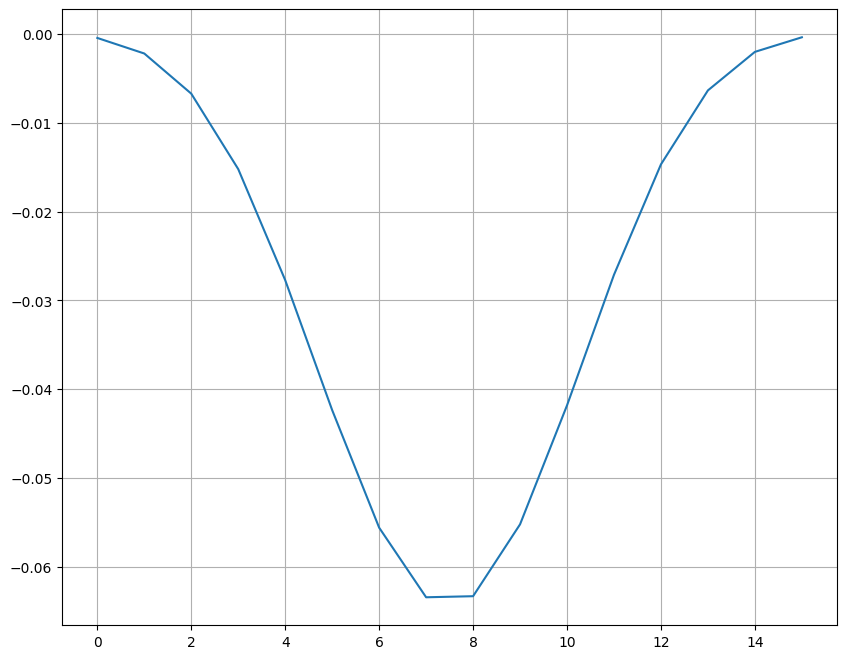

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Sebagai catatan, tanda negatif tidak memiliki arti dikarenakan kita hanya mengoptimalkan untuk magnitudo. Magnitudo dari respon frekuensinya adalah:

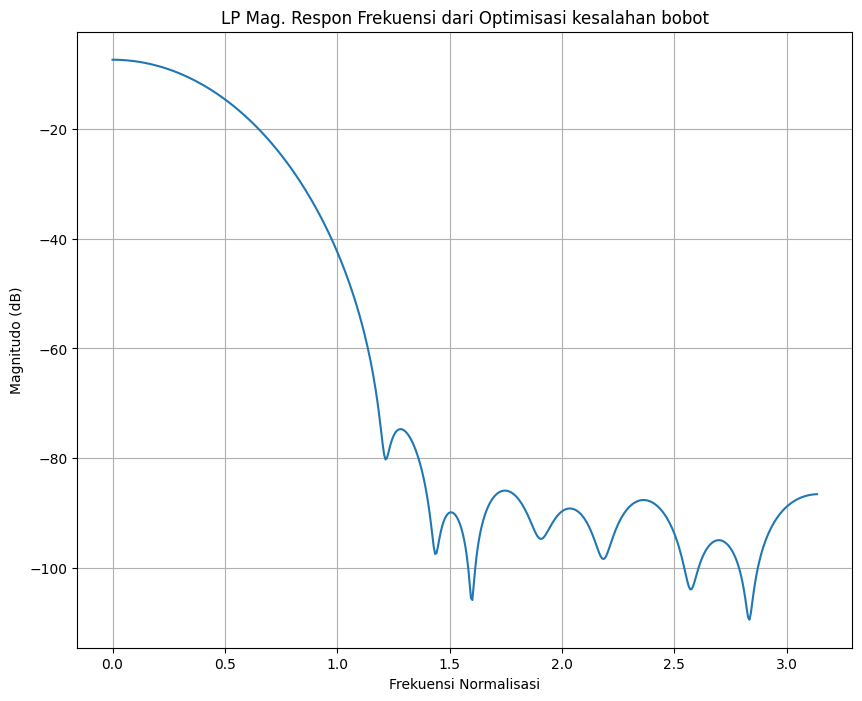

In [ ]:
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.xlabel('Frekuensi Normalisasi')
plt.ylabel('Magnitudo (dB)')
plt.title('LP Mag. Respon Frekuensi dari Optimisasi kesalahan bobot')
plt.grid()

Pada kondisi tertentu, optimisasi ini dapat memberikan jawaban yang terbaik untuk berbagai pengaplikasian. Ada juga jendela yang instan untuk desain filter, dengan trade-off yang berbeda antara lebar pita transisi dan attenuasi pita henti.

# Jendela Raised Cosine

Jendela raised cosine juga dikenal sebagai jendela Hann

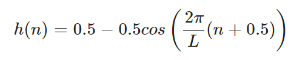

dengan n = 0,...,L-1 untuk panjang jendela genap.

Sebagai contoh raised cosine dengan panjang jendela genap dan L = 16. Didapatkan plot sebagai berikut:

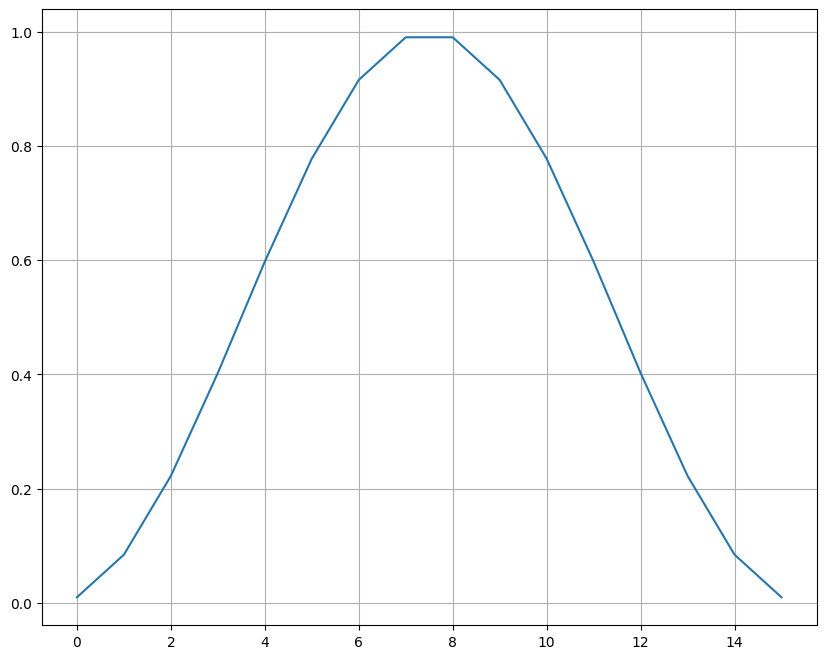

In [ ]:
h=0.5-0.5*np.cos(2*np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Untuk jendela ganjil, didapatkan:

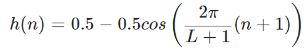

dengan n = 0,...,L-1

Contoh untuk L = 17:

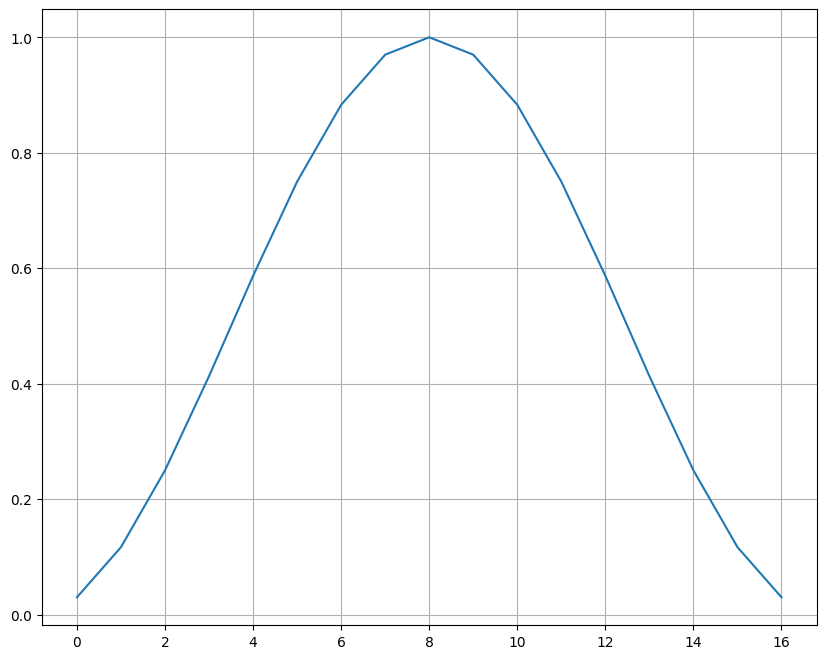

In [ ]:
h=0.5-0.5*np.cos(2*np.pi/18*(np.arange(17)+1))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Untuk jendela Sinus, kita mendapatkan L = 16:

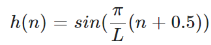

dengan n = 0,…,L-1 untuk panjang jendela genap L, atau

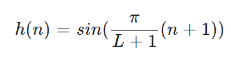

dengan n=0,…,L-1 untuk panjang jendela ganjil L.

Contoh untuk L = 16:

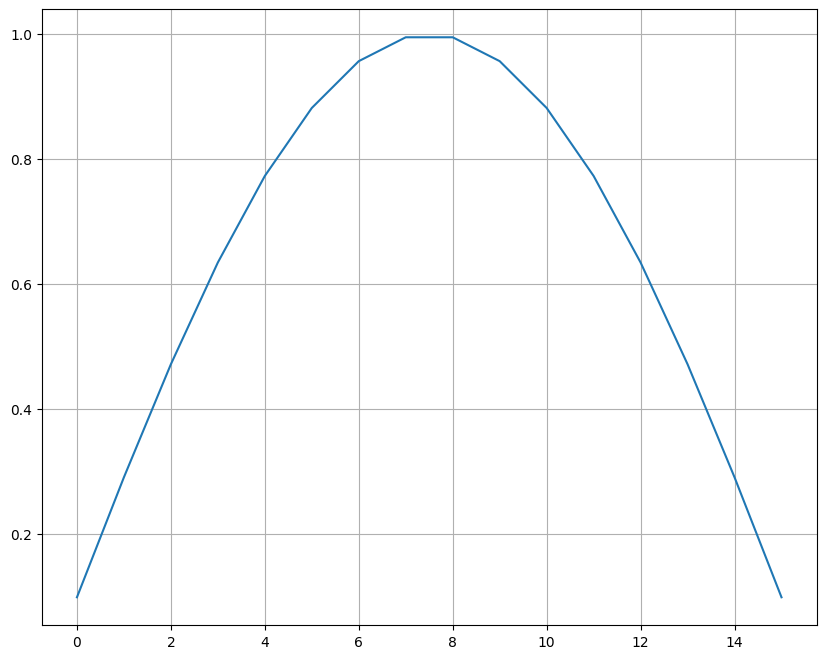

In [ ]:
s=np.sin(np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(s)
plt.grid()

# Jendela Kaiser

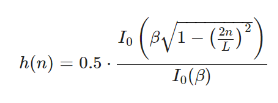

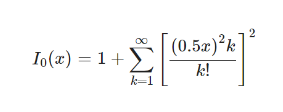

Dalam desain praktis, 20 istilah pertama biasanya digunakan (Strang, Nguyen, "Wavelets dan Filter Banks"). Parameter β digunakan untuk menukar bandwidth transisi  filter dan redaman stopband.


Contoh untuk L=16 dan β=2, dengan iPython:


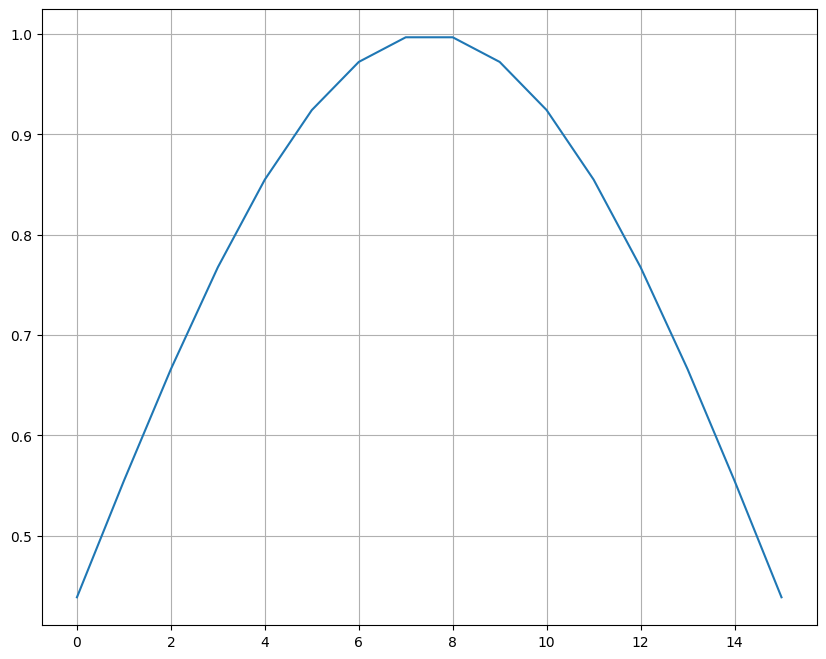

In [ ]:
hk=np.kaiser(16,2)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

Untuk β=8 kita dapatkan:

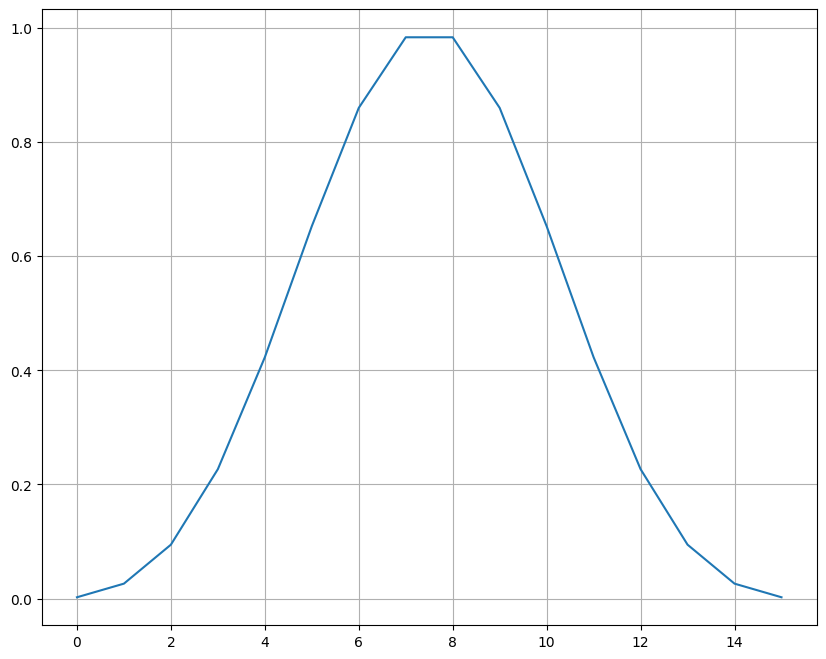

In [ ]:
hk=np.kaiser(16,8)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()